In [2]:
import numpy as np

import sys # needed to import cat_utils
sys.path.insert(0, '/nfs/mwa-09/r1/abrahamn/21cmIR/21cmIRxcor') 

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import imp
import cat_utils
imp.reload(cat_utils)

import cPickle as pickle

from astropy.io import fits

In [4]:
#mwa_img,mwa_img_counts = pickle.load(open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/mwa_and_ir_catalogs_xcor2/mwa_img_with_counts.p",'rb'))
mwa_img,mwa_img_counts = pickle.load(open( "/nfs/mwa-09/r1/abrahamn/xcor_data/ir_catalogs/mwa_and_ir_catalogs_xcor2/mwa_img_with_counts.p",'rb'))

In [7]:
dtheta_deg = 2./60
w2_qsoagn_img, w2_qsoagn_img_counts = pickle.load(open( "/nfs/mwa-09/r1/abrahamn/xcor_data/ir_catalogs/mwa_and_ir_catalogs_xcor2/w2_w1-w2>0.6_img_with_counts.p", "rb" ) )
w2_gal_img, w2_gal_img_counts = pickle.load(open( "/nfs/mwa-09/r1/abrahamn/xcor_data/ir_catalogs/mwa_and_ir_catalogs_xcor2/w2_w1-w2<0.6_img_with_counts.p", "rb" ) )

In [8]:

# catalogs to coherence (ie, normalized cross spectrum)
def imgs_to_cspec_ell(img1,img2,dtheta_deg,nbins,lmin,lmax,labels,hann=True,ylim=[-.2,.2],xlim=[1,300]):

    c = xspec/np.sqrt(pspec1*pspec2)
    dc = np.sqrt(.5*(1+c**2)/(1.*bin_counts/4))

    c_f = xspec_f/np.sqrt(pspec1_f*pspec2_f)
    dc_f = np.sqrt(.5*(1+c_f**2)/(1.*bin_counts/4))

    plt.subplot(131)
    plt.loglog(lbins,pspec1,'bo-')
    plt.xlim(xlim)
    plt.xlabel('$\ell$')
    plt.ylabel('$C_\ell$')
    plt.title(labels[0])
    
    plt.subplot(132)
    plt.loglog(lbins,pspec2,'bo-')
    plt.xlim(xlim)
    plt.xlabel('$\ell$')
    plt.ylabel('$C_\ell$')
    plt.title(labels[1])
    #plt.loglog(lbins,lbins**(-1.5)*1.e-10,'k-')
    
    plt.subplot(133)
    plt.errorbar(lbins,c,yerr=dc,fmt='bo-')
    plt.errorbar(lbins*1.1,c_f,yerr=dc_f,fmt='ro-')
    plt.semilogx([.1,10000],[0,0],'k-')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('$\ell$')
    plt.ylabel('$C_\ell$')
    plt.title(labels[0]+'--'+labels[1])
    
    plt.tight_layout()
    


maximum ell is 7622
maximum ell is 7622
maximum ell is 7622
maximum ell is 7622


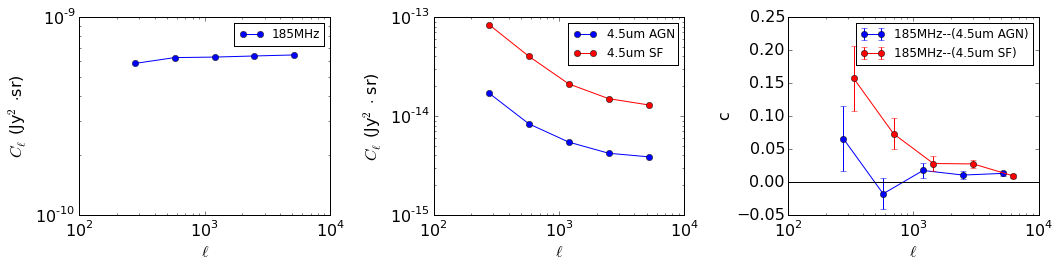

In [9]:
# compare w2_qsoagn and w2_gal

nbins,lmin,lmax = 5,180,7000

lbins,pspec_mwa,pspec_qsoagn,xspec_mwa_qsoagn,bin_counts = cat_utils.calc_xspec(mwa_img,w2_qsoagn_img,dtheta_deg,nbins=nbins,lmin=lmin,lmax=lmax,hann=True,uselogbins=True)
lbins,pspec_mwa_f,pspec_qsoagn_f,xspec_mwa_qsoagn_f,bin_counts = cat_utils.calc_xspec(mwa_img,np.rot90(w2_qsoagn_img),dtheta_deg,nbins=nbins,lmin=lmin,lmax=lmax,hann=True,uselogbins=True)

c_mwa_qsoagn = xspec_mwa_qsoagn/np.sqrt(pspec_mwa*pspec_qsoagn)
dc_mwa_qsoagn = np.sqrt(.5*(1+c_mwa_qsoagn**2)/(1.*bin_counts/4))
c_mwa_qsoagn_f = xspec_mwa_qsoagn_f/np.sqrt(pspec_mwa_f*pspec_qsoagn_f)
dc_mwa_qsoagn_f = np.sqrt(.5*(1+c_mwa_qsoagn_f**2)/(1.*bin_counts/4))

lbins,pspec_mwa,pspec_gal,xspec_mwa_gal,bin_counts = cat_utils.calc_xspec(mwa_img,w2_gal_img,dtheta_deg,nbins=nbins,lmin=lmin,lmax=lmax,hann=True,uselogbins=True)
lbins,pspec_mwa_f,pspec_gal_f,xspec_mwa_gal_f,bin_counts = cat_utils.calc_xspec(mwa_img,np.rot90(w2_gal_img),dtheta_deg,nbins=nbins,lmin=lmin,lmax=lmax,hann=True,uselogbins=True)

c_mwa_gal = xspec_mwa_gal/np.sqrt(pspec_mwa*pspec_gal)
dc_mwa_gal = np.sqrt(.5*(1+c_mwa_gal**2)/(1.*bin_counts/4))
c_mwa_gal_f = xspec_mwa_gal_f/np.sqrt(pspec_mwa_f*pspec_gal_f)
dc_mwa_gal_f = np.sqrt(.5*(1+c_mwa_gal_f**2)/(1.*bin_counts/4))


plt.figure(figsize=(15,4))
matplotlib.rcParams.update({'font.size': 16})
xlim = [100,1.e4]

plt.subplot(131)
plt.loglog(lbins,pspec_mwa,'bo-',label='185MHz')
plt.xlim(xlim)
plt.legend(fontsize=12)
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell$ (Jy$^2\cdot$sr)')

plt.subplot(132)
plt.loglog(lbins,pspec_qsoagn,'bo-',label='4.5um AGN')
plt.loglog(lbins,pspec_gal,'ro-',label='4.5um SF')
plt.xlim(xlim)
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell$ (Jy$^2\cdot$ sr)')
plt.legend(fontsize=12)

plt.subplot(133)
a=1.1
plt.errorbar(lbins,c_mwa_qsoagn,yerr=dc_mwa_qsoagn,fmt='bo-',label='185MHz--(4.5um AGN)')
# plt.errorbar(lbins*a,c_mwa_qsoagn,yerr=dc_mwa_qsoagn_f,fmt='bv-',label='MWA, WISE QSO/AGN (flipped)')
plt.errorbar(lbins*a**2,c_mwa_gal,yerr=dc_mwa_gal,fmt='ro-',label='185MHz--(4.5um SF)')
# plt.errorbar(lbins*a**3,c_mwa_gal_f,yerr=dc_mwa_gal_f,fmt='rv-',label='MWA, WISE LRG/SF (flipped)')
plt.legend(fontsize=12)
plt.semilogx([.1,12000],[0,0],'k-')
plt.xlim(xlim)
plt.xlabel('$\ell$')
plt.ylabel('c')
plt.ylim([-.05,.25])

plt.tight_layout()
plt.savefig('mwa_wise_qsoagn_gal_xspec.pdf',bbox_inches='tight')

In [88]:
n = 100000
np.mean((np.random.randn(n)+1)*(np.random.randn(n)+.3)*(np.random.randn(n)+.5))

0.15507942344169595

In [85]:
.3*.5

0.15

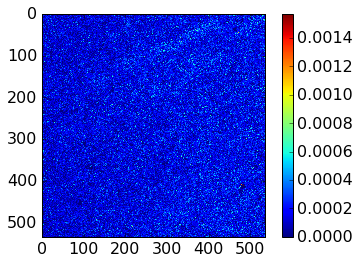

In [64]:
plt.imshow(w2_qsoagn_img,interpolation='nearest')
plt.colorbar()

maximum ell is 7622
maximum ell is 7622


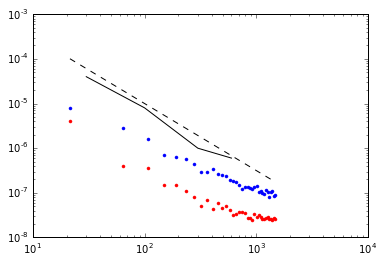

In [54]:
# compare with SDSS angular power spectrun

nbins,lmin,lmax = 35,0,1500

lbins,pspec_qsoagn,pspec2,xspec,bin_counts = cat_utils.calc_xspec(w2_qsoagn_img,w2_qsoagn_img_counts,dtheta_deg,nbins=nbins,lmin=lmin,lmax=lmax,hann=True,uselogbins=False)
lbins,pspec_gal,pspec2,xspec,bin_counts = cat_utils.calc_xspec(w2_gal_img,w2_gal_img_counts,dtheta_deg,nbins=nbins,lmin=lmin,lmax=lmax,hann=True,uselogbins=False)

plt.loglog(lbins,pspec_qsoagn*5000000,'r.')
plt.loglog(lbins,pspec_gal*5000000,'b.')
plt.loglog([30,100,300,600],[4.e-5,8.e-6,1.e-6,6.e-7],'k-')
plt.loglog(lbins,1.e-2*lbins**(-1.5),'k--')